In [5]:
import pandas as pd
import sqlite3
import os

excel_file = "/content/Sales Dataset.xlsx"
df = pd.read_excel(excel_file)

print("Preview of uploaded data:")
print(df.head())


if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

df.to_sql("sales", conn, if_exists='append', index=False)


Preview of uploaded data:
   id       date product  quantity  price
0   1 2025-06-01   Apple        10     30
1   2 2025-06-01  Banana         5     10
2   3 2025-06-02   Apple         7     30
3   4 2025-06-02  Orange         8     20
4   5 2025-06-03  Banana        12     10


8


Sales Summary:
  product  total_qty  revenue
0   Apple         23    690.0
1  Banana         26    260.0
2  Orange         13    260.0


<Figure size 800x500 with 0 Axes>

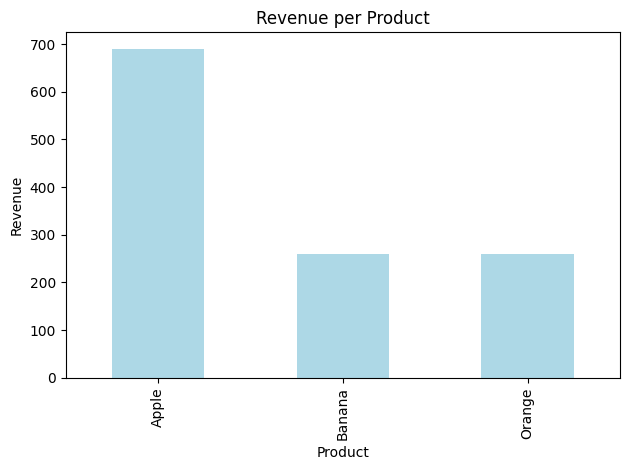

In [6]:
import matplotlib.pyplot as plt

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
summary_df = pd.read_sql_query(query, conn)
conn.close()

print("\nSales Summary:")
print(summary_df)

plt.figure(figsize=(8, 5))
summary_df.plot(kind='bar', x='product', y='revenue', legend=False, color='lightblue')
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

plt.savefig("sales_chart.png")
plt.show()
